## Assignment 2
    1. Name: Vaibhav Bichave
    2. Batch: P-10
    3. Roll No.: 43209
    
   ### Problem Statement :
    Implementing Feedforward neural networks with Keras and TensorFlow

#### a. Import necessary packages

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#### b. Load the training and testing data (MNIST/CIFAR10)
Grabbing the mnist dataset

In [10]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [11]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

#### c. Define the network architecture using Keras
Building the model

In [12]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

#### d. Train the model using SGD

In [13]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.3089 - accuracy: 0.1916 - val_loss: 2.2612 - val_accuracy: 0.2154
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2385 - accuracy: 0.3252 - val_loss: 2.2115 - val_accuracy: 0.4688
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1824 - accuracy: 0.4775 - val_loss: 2.1447 - val_accuracy: 0.5425
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1038 - accuracy: 0.5598 - val_loss: 2.0488 - val_accuracy: 0.6049
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9901 - accuracy: 0.6038 - val_loss: 1.9119 - val_accuracy: 0.6428
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 1.8340 - accuracy: 0.6388 - val_loss: 1.7330 - val_accuracy: 0.6669
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 1.6453 - accuracy: 0.6667 - val_loss: 1.5348 - val_accuracy: 0.6960
Epoch 

#### e. Evaluate the network
Making the predictions

In [6]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       980
           1       0.78      0.98      0.87      1135
           2       0.83      0.74      0.79      1032
           3       0.64      0.82      0.72      1010
           4       0.66      0.79      0.72       982
           5       0.84      0.45      0.59       892
           6       0.82      0.87      0.85       958
           7       0.80      0.86      0.83      1028
           8       0.84      0.55      0.67       974
           9       0.68      0.52      0.59      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.76      0.75     10000



#### f. Plot the training loss and accuracy

[]

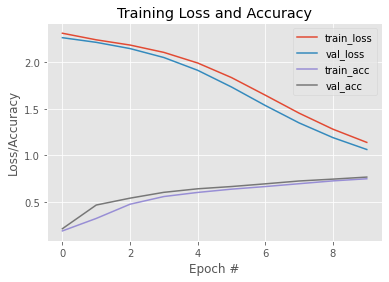

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.plot()